In [268]:

import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import*

### **Plotting functions**

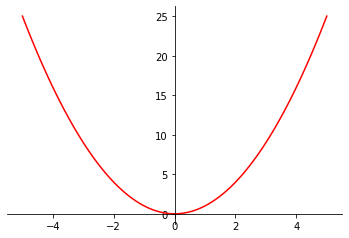

In [269]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

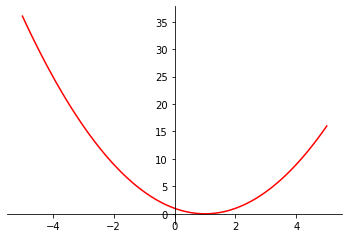

In [270]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = (x - 1) ** 2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

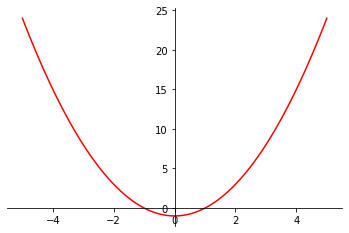

In [271]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x ** 2 - 1

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

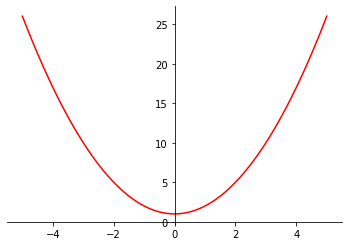

In [272]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x ** 2 + 1

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

##**Solving quadratic equation Using Classic and Po Shen Method**

**Classic**

In [273]:
x = Symbol('x')

In [274]:
result = solveset(x**2, x);
result

{0}

In [275]:
result = solveset((x - 1) ** 2, x);
result

{1}

In [276]:
result = solveset(x ** 2 - 1, x);
result  

{-1, 1}

In [277]:
result= solveset(x ** 2 + 1, x); 
result

{-I, I}

**Po Shen**

In [278]:
# Po shen Loh implementation
import math
from sympy import symbols, solve


# function for finding roots 
def PoShenLoh( a, b, c): 
	
  u = symbols('u')

  auxNum = -b/2
  
  expr = auxNum**2-u**2 - c

  sol = solve(expr)
  if len(sol)>1:
    r = auxNum + sol[0]
    s = auxNum + sol[1]
    print(r)
    print(s)
  else: 
    print("real and same roots")
    r = auxNum + sol[0]
    s = auxNum + sol[0]
    print(r)

# **Aplicando metodo de Po Shen Loh $x^2$**

In [279]:
print("Solution with the Po Shen Loh Method")
print()
PoShenLoh(1,0,0)

Solution with the Po Shen Loh Method

real and same roots
0


# **Aplicando metodo de Po Shen Loh $(x-1)^2$**

In [280]:
print("Solution with the Po Shen Loh Method")
print()
PoShenLoh(1,-2,1)

Solution with the Po Shen Loh Method

real and same roots
1.00000000000000


# **Aplicando metodo de Po Shen Loh $x^2 - 1 $**

In [281]:
print("Solution with the Po Shen Loh Method")
print()
PoShenLoh(1,0,-1)

Solution with the Po Shen Loh Method

-1.00000000000000
1.00000000000000


# **Aplicando metodo de Po Shen Loh $x^2 + 1 $**

In [282]:
print("Solution with the Po Shen Loh Method")
print()
PoShenLoh(1,0,1)

Solution with the Po Shen Loh Method

-I
I


# **Plotting Newton fractals**

In [283]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):

    # Fractals using newton-raphson

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # Step size for numerical derivative
    h = 1e-7
    # Max error allowed
    eps = 1e-3 

    # Bounding roots
    r1 = 0

    # Color multiplication factor
    # Note: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # Complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    # Newton iteration
                    znext = z - f(z) / dz 

                    # Stop when close enough to any root
                    if abs(znext - z) < eps: 
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # Color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    
    # Display a newton-raphson fractal

    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x) = $z^{2}$')
    plt.xlabel("Real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("Imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


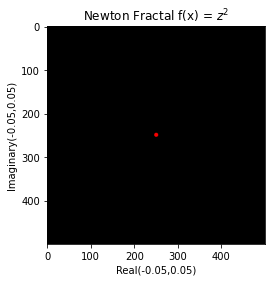

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


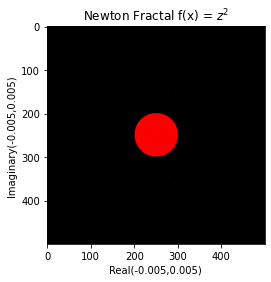

Z region from ( -0.0025 , -0.0025 ) to ( 0.0025 , 0.0025 )


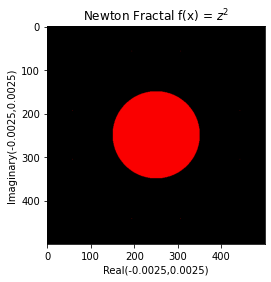

Z region from ( -0.00025 , -0.00025 ) to ( 0.00025 , 0.00025 )


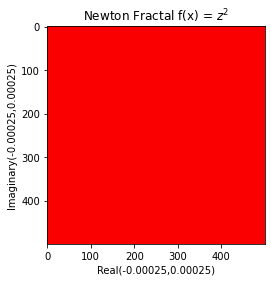

In [284]:
print("zoom out")
display1(zoom=0.10)
display1(zoom=0.01)
display1(zoom=0.005)
display1(zoom=0.0005)


In [285]:

def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)

def newton_set2(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):

    # Fractals using newton-raphson

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # Step size for numerical derivative
    h = 1e-7
    # Max error allowed 
    eps = 1 

    # Bounding roots
    r1 = 1

    # Color multiplication factor
    # Note: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # Complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    # Newton iteration
                    znext = z - f(z) / dz 

                    # Stop when close enough to any root
                    if abs(znext - z) < eps: 
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # Color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display2(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    
    # Display a newton-raphson fractal

    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set2(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x) = $(z-1)^{2}$')
    plt.xlabel("Real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("Imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


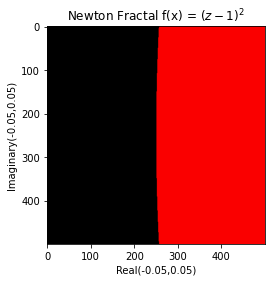

In [286]:
print("zoom out")
display2(zoom=0.1)


In [287]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z

def newton_set3(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    
    # Fractals using newton-raphson

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # Step size for numerical derivative
    h = 1e-7 
    # Max error allowed
    eps = 1e-3 

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # Note: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # Complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    # Newton iteration
                    znext = z - f(z) / dz 

                    # Stop when close enough to any root
                    if abs(znext - z) < eps: 
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # Color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # Color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display3(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    
    # Display a newton-raphson fractal

    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set3(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x) = $z^{2}-1$')
    plt.xlabel("Real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("Imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


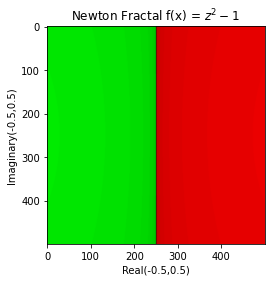

In [288]:
print("zoom out")
display3(zoom=1)

In [289]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

def newton_set4(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    
    # Fractals using newton-raphson

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # Step size for numerical derivative
    h = 1e-7 
    # Max error allowed
    eps = 1e-3 

    # Bounding roots
    r1 = complex(0,1)
    r2 = complex(0,-1)

    # Color multiplication factor
    # Note: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # Complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    # Newton iteration
                    znext = z - f(z) / dz 

                    # Stop when close enough to any root
                    if abs(znext - z) < eps: 
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # Color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # Color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display4(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    
    # Display a newton-raphson fractal

    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set4(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x) = $z^{2}+1$')
    plt.xlabel("Real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("Imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


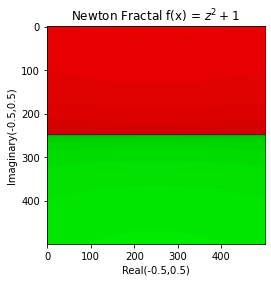

In [290]:
print("zoom out")
display4(zoom=1)

## **Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.**

### Applied to $x^2$

In [291]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

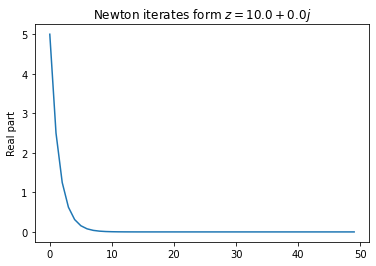

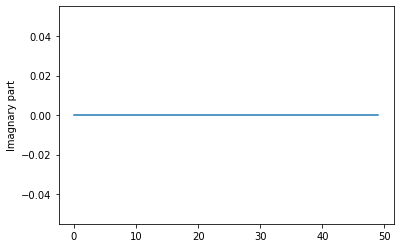

In [292]:
z = 10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

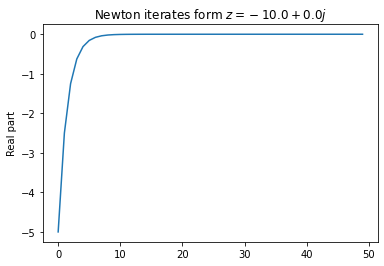

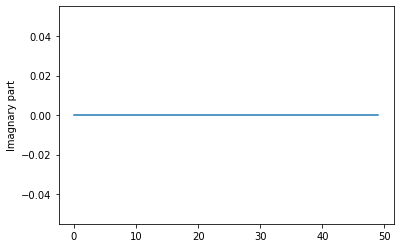

In [293]:
z = -10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = -10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

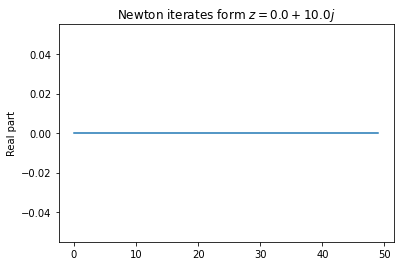

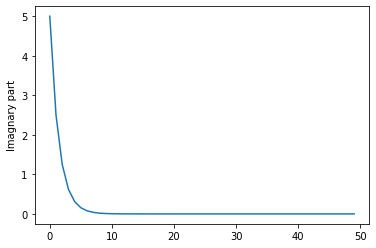

In [294]:
z = 0.0 + 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 + 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

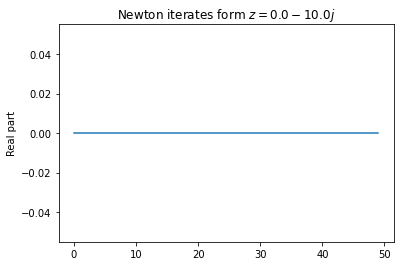

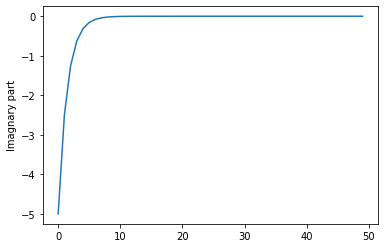

In [295]:
z = 0.0 - 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 - 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Applied to $(x-1)^2$

In [296]:
# (x-1)^2 = x^2 -2x +1

def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z - 2

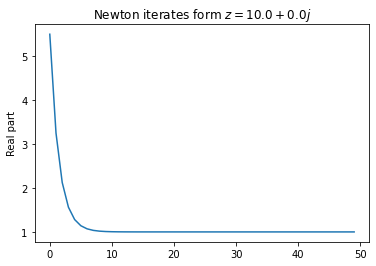

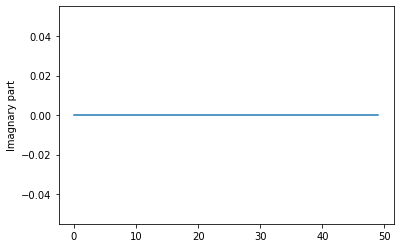

In [297]:
z = 10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

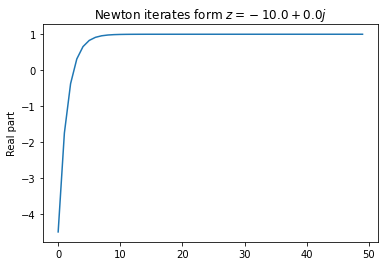

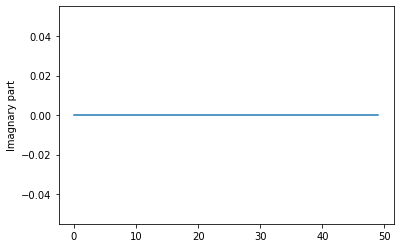

In [298]:
z = -10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = -10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

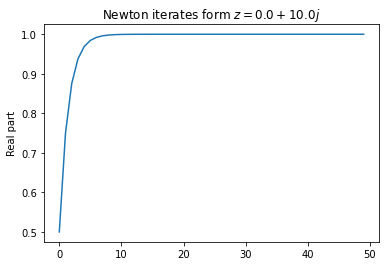

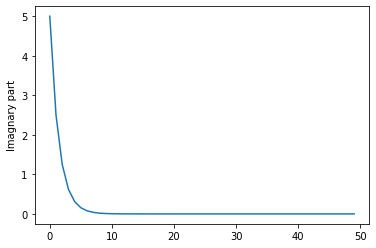

In [299]:
z = 0.0 + 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 + 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

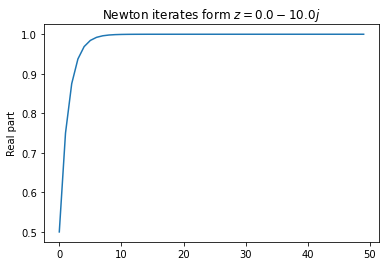

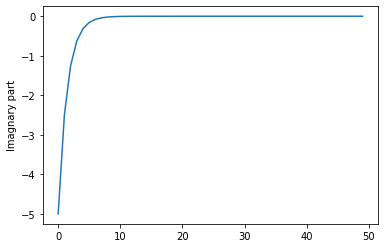

In [300]:
z = 0.0 - 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 - 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Applied to $x^2 - 1$

In [301]:
def f(z):
    return z**2 - 1

def df(z):
    return 2 * z 

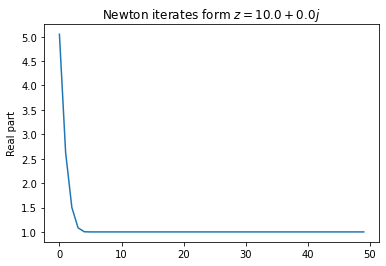

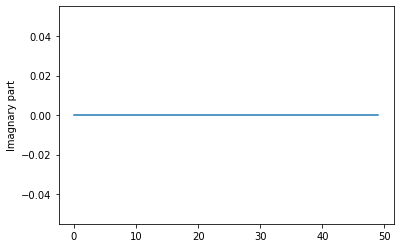

In [302]:
z = 10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

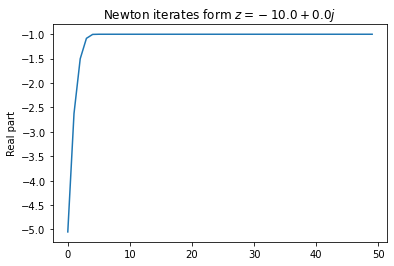

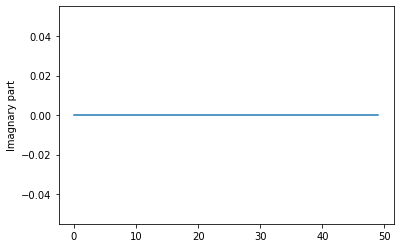

In [303]:
z = -10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = -10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

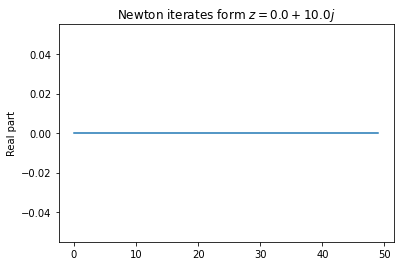

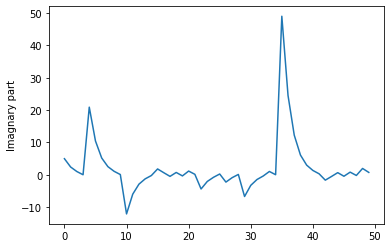

In [304]:
z = 0.0 + 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 + 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

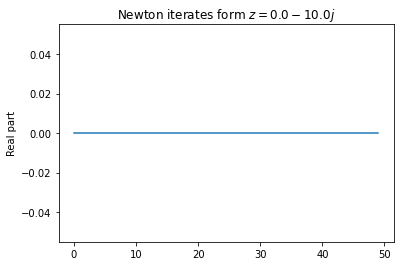

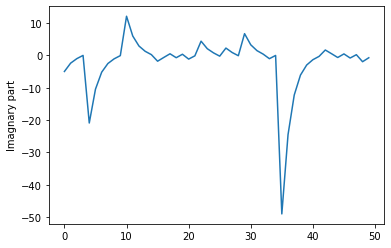

In [305]:
z = 0.0 - 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 - 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Applied to $x^2 + 1$

In [306]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

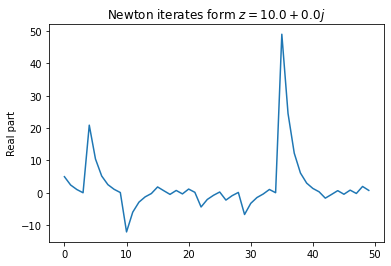

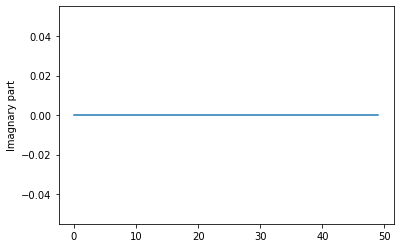

In [307]:
z = 10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

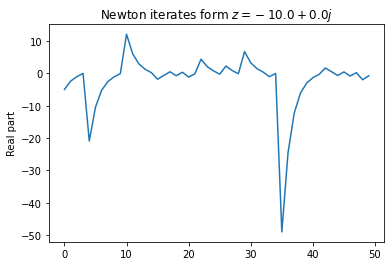

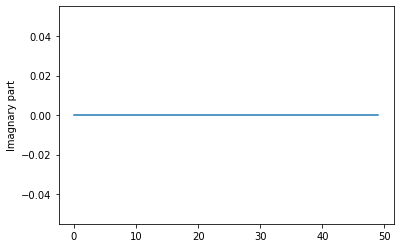

In [308]:
z = -10.0 + 0.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = -10.0 + 0.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

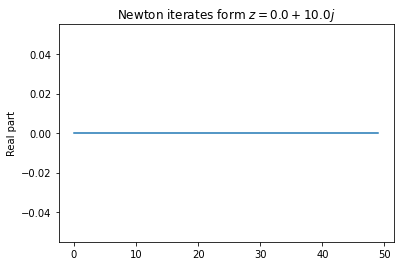

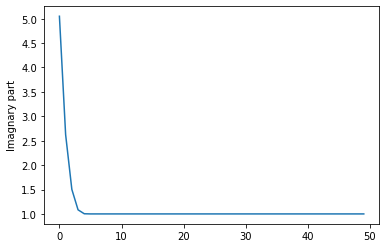

In [309]:
z = 0.0 + 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 + 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

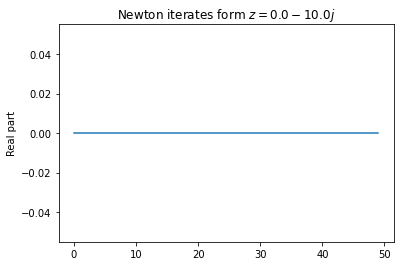

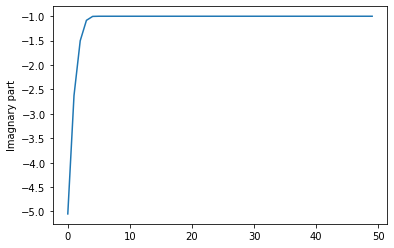

In [310]:
z = 0.0 - 10.0j
r = []
i = []
for k in range(50):
  dz = df(z)
  # Newton iteration
  z = z - f(z) / dz 
  r.append(np.real(z))
  i.append(np.imag(z))

plt.title('Newton iterates form $z = 0.0 - 10.0j$')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()